<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-of-Surface-Pressure-on-MPAS-grid" data-toc-modified-id="Plot-of-Surface-Pressure-on-MPAS-grid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot of Surface Pressure on MPAS grid</a></span><ul class="toc-item"><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Read-Data-from-MPAS-Grid" data-toc-modified-id="Read-Data-from-MPAS-Grid-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read Data from MPAS Grid</a></span></li><li><span><a href="#Convert-to-degrees-from-radians" data-toc-modified-id="Convert-to-degrees-from-radians-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Convert to degrees from radians</a></span></li><li><span><a href="#Global-tripcolor-plot" data-toc-modified-id="Global-tripcolor-plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Global tripcolor plot</a></span></li></ul></li></ul></div>

# Plot of Surface Pressure on MPAS grid

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from ngallery_utils import DATASETS

## Get Data

In [2]:
DATASETS.registry_files

['thetao_Omon_historical_GISS-E2-1-G_r1i1p1f1_gn_185001-185512.nc',
 'woa2013v2-O2-thermocline-ann.nc',
 'NOAA_NCDC_ERSST_v3b_SST.nc',
 'sst_indices.csv',
 'air_temperature.nc',
 'rasm.nc',
 'co2.nc',
 'moc.nc',
 'aviso_madt_2015.tar.gz',
 'NARR_19930313_0000.nc',
 'MPAS.nc']

In [3]:
path = DATASETS.fetch("MPAS.nc")

## Read Data from MPAS Grid

In [4]:
ds = xr.open_dataset(path)
ds = ds.squeeze()
ds

<xarray.Dataset>
Dimensions:           (nCells: 163842)
Dimensions without coordinates: nCells
Data variables:
    lonCell           (nCells) float64 ...
    latCell           (nCells) float64 ...
    surface_pressure  (nCells) float64 ...

In [5]:
# Not sure what the pressure units are, there's not much metadata info on this file
ds["surface_pressure"] = ds["surface_pressure"] / 1000.

## Convert to degrees from radians

In [6]:
ds["lonCell"] = np.degrees(ds.lonCell)
ds["latCell"] = np.degrees(ds.latCell)

## Global tripcolor plot

In [7]:
triang = tri.Triangulation(ds.lonCell, ds.latCell)

In [8]:
import cmaps as cm  # for NCL colormaps

In [9]:
# Don't use white by cutting out the first section of the colormap
from matplotlib.colors import LinearSegmentedColormap
interval = np.hstack([np.linspace(0.15, 1)])
colors = cm.WhiteBlueGreenYellowRed(interval)
c = LinearSegmentedColormap.from_list('name', colors)

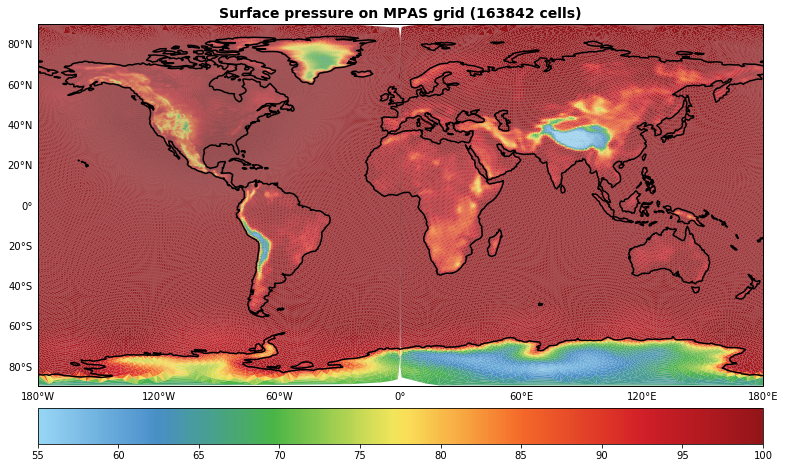

CPU times: user 1min 9s, sys: 936 ms, total: 1min 10s
Wall time: 1min 10s


In [10]:
%%time

fig = plt.figure(figsize=(13, 13))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.tripcolor(triang,
                  ds.surface_pressure,
                  edgecolors='k',
                  lw=0.01,
                  alpha=1,
                  transform=ccrs.PlateCarree(),
                  cmap=c,
                  vmin=55.0,
                  vmax=100.)
ax.set_global()
ax.coastlines(lw=1.5, resolution='110m')
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = gl.ylabels_right = False
gl.xlines = gl.ylines = False
plt.colorbar(mm, orientation='horizontal', pad=0.03)
plt.title(f"Surface pressure on MPAS grid ({len(ds.lonCell)} cells)",
          fontweight="bold",
          fontsize=14)

plt.show()


-------------

**NCL Script**: https://www.ncl.ucar.edu/Applications/Scripts/mpas_1.ncl

**NCL Plot**:

![](https://www.ncl.ucar.edu/Applications/Images/mpas_1_lg.png)

In [12]:
%load_ext watermark
%watermark -ud -iv -m -g -h

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      1.17.3
cartopy    0.17.0
xarray     0.14.0
matplotlib 3.1.2
last updated: 2019-11-12 

compiler   : GCC 7.3.0
system     : Linux
release    : 3.10.0-693.21.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
host name  : casper26
Git hash   : af27b870aca78a042cce01ad5979fad301f5f87b
